<a href="https://colab.research.google.com/github/nugi1209/Accenture_Data_Analytics_Virtual_Experience/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/nugi1209/Accenture_Data_Analytics_Virtual_Experience/blob/main/Task1RevisedCsv.csv?raw=true", delimiter = ";")
df.head()

,content_id,reaction_type,datetime,sentiment,score,content_user_id,category,content_type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,02/11/2020 06:28,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo


Questions to ask:
- Overall reaction
- Overall sentiment
- Overall score
- How many reactions on each category
- Sum or average of category's contents


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].min()
df['datetime'].max()

Timestamp('2020-01-07 00:32:00')

In [32]:
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time
df.head()

,content_id,reaction_type,datetime,sentiment,score,content_user_id,category,content_type,date,month,year,time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2020-07-11,7,2020,09:43:00
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2021-06-01,6,2021,19:13:00
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2021-06-17,6,2021,12:22:00
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2021-04-18,4,2021,05:13:00
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2020-02-11 06:28:00,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,studying,photo,2020-02-11,2,2020,06:28:00


In [4]:
df.describe()

,score
count,24573.000000
mean,39.622553
std,26.043011
min,0.000000
25%,15.000000
50%,35.000000
75%,65.000000
max,75.000000


In [5]:
df["category"].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture',
       '"culture"', '"studying"', '"animals"', '"soccer"', '"dogs"',
       '"food"', '"technology"', '"cooking"', '"public speaking"',
       '"veganism"', '"science"'], dtype=object)

In [6]:
df["category"] = df["category"].str.replace('\"', '')
df["category"].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

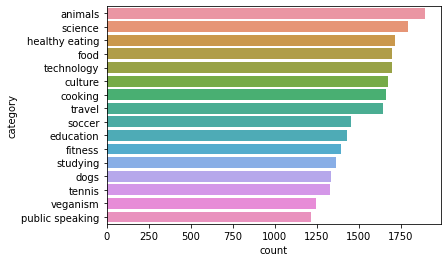

In [7]:

sns.countplot(data = df, y = df["category"],
             order = df['category'].value_counts().index)

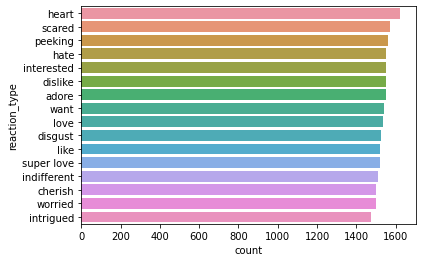

In [8]:

sns.countplot(data = df, y = df["reaction_type"],
             order = df['reaction_type'].value_counts().index)

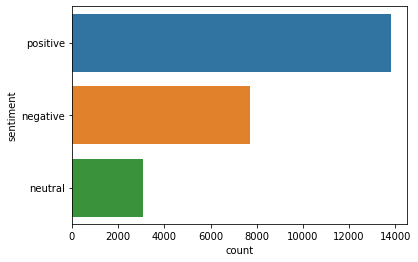

In [9]:

sns.countplot(data = df, y = df["sentiment"],
             order = df['sentiment'].value_counts().index)

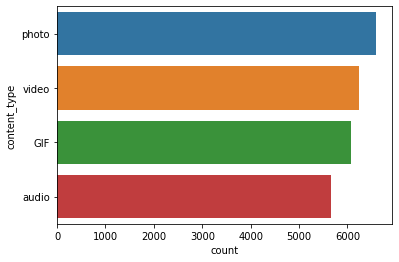

In [10]:

sns.countplot(data = df, y = df["content_type"],
             order = df['content_type'].value_counts().index)

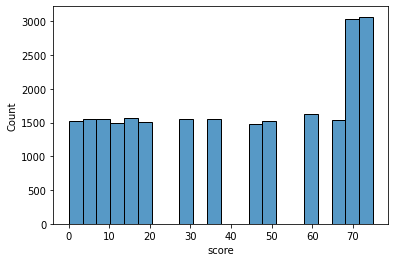

In [11]:
sns.histplot(data = df, x = df['score'])

In [12]:
df['score'].unique()

array([ 0, 10, 15,  5, 30, 20, 35, 65, 70, 75, 45, 12, 50, 60, 72])

In [13]:
df_cn_sc = df.groupby(by = 'content_id', as_index= False).sum()

df_cn_sc.head()

,content_id,score
0,004e820e-49c3-4ba2-9d02-62db0065410c,60
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,2013
2,01396602-c759-4a17-90f0-8f9b3ca11b30,1303
3,019b61f4-926c-438e-adaf-6119c5eab752,454
4,01ab84dd-6364-4236-abbb-3f237db77180,15


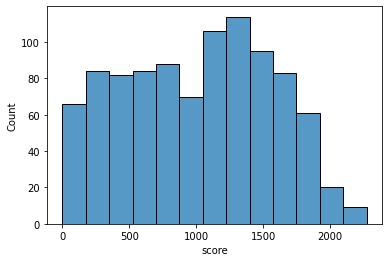

In [30]:
sns.histplot(data = df_cn_sc, x = df_cn_sc['score'])

In [15]:
df_cn_cat = df.groupby(by = ['content_id', 'sentiment'], as_index= False).count()
df_cn_cat.head()

,content_id,sentiment,reaction_type,datetime,score,content_user_id,category,content_type
0,004e820e-49c3-4ba2-9d02-62db0065410c,positive,1,1,1,1,1,1
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,negative,13,13,13,13,13,13
2,00d0cdf9-5919-4102-bf84-ebde253c3cd2,neutral,4,4,4,4,4,4
3,00d0cdf9-5919-4102-bf84-ebde253c3cd2,positive,29,29,29,29,29,29
4,01396602-c759-4a17-90f0-8f9b3ca11b30,negative,15,15,15,15,15,15


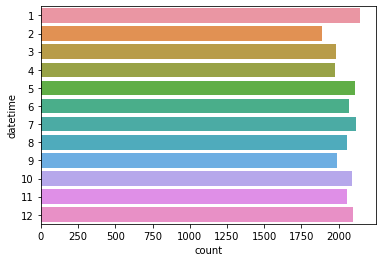

In [16]:
sns.countplot(data = df, y = df['datetime'].dt.month)


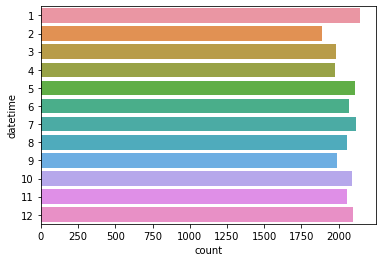

In [18]:
sns.countplot(data = df, y = df['datetime'].dt.month)

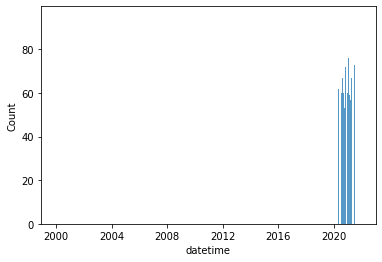

In [28]:
sns.histplot(data = df, x = df['datetime'].dt.date)